# Chapter 3-1

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm

import os
import glob

In [19]:
image_dir = "E:/ED_MS/Semester_3/Dataset/DIC_Set/DIC_Set1_Annotated"
image_type = "tif"
mask_dir = "E:/ED_MS/Semester_3/Dataset/DIC_Set/DIC_Set1_Masks"
mask_type = "tif"
weight_map_dir = "E:/ED_MS/Semester_3/Dataset/DIC_Set/DIC_Set1_Weights"
weight_map_type = "npy"
dataset_name = "DIC"

fig_save_path = "E:/ED_MS/Semester_3/Codes/MyProject/saved_figures"

## 3.1 A Small Dataset of Cell Images

Dataset Sample

In [3]:
image_6_path = "E:/ED_MS/Semester_3/Dataset/DIC_Set/DIC_Set1_Annotated/img_000006_1.tif"
mask_6_path = "E:/ED_MS/Semester_3/Dataset/DIC_Set/DIC_Set1_Masks/img_000006_1_mask.tif"
weight_map_6_path = "E:/ED_MS/Semester_3/Dataset/DIC_Set/DIC_Set1_Weights/img_000006_1_weights.npy"

image_6 = cv2.imread(image_6_path, cv2.IMREAD_GRAYSCALE)
mask_6 = cv2.imread(mask_6_path, cv2.IMREAD_GRAYSCALE)
weight_map_6 = np.load(weight_map_6_path)

In [49]:
def set_axis_invisible(ax):
    if isinstance(ax, (list, tuple)):
        for ax_i in ax:
            ax_i.xaxis.set_visible(False)
            ax_i.yaxis.set_visible(False)
    else:
        ax.xaxis.set_visible(False)
        ax.yaxis.set_visible(False)


def show_the_triple(image, mask, weight_map, axes, axis_title_list=None):
    imshow_kwargs = {"cmap": "gray", "vmin": 0, "vmax": 255}
    abc = ["a", "b", "c"]
    axes[0].imshow(image, **imshow_kwargs)
    axes[1].imshow(mask, **imshow_kwargs)
    axes[2].imshow(weight_map)
    set_axis_invisible([axes[0], axes[1], axes[2]])

    if axis_title_list is not None:
        axes[0].set_title(axis_title_list[0], y=0, pad=-20, verticalalignment="top")
        axes[1].set_title(axis_title_list[1], y=0, pad=-20, verticalalignment="top")
        axes[2].set_title(axis_title_list[2], y=0, pad=-20, verticalalignment="top")
    else:
        axes[0].set_title("(a) Original photo", y=0, pad=-20, verticalalignment="top")
        axes[1].set_title("(b) Mask", y=0, pad=-20, verticalalignment="top")
        axes[2].set_title("(c) Weight Map", y=0, pad=-20, verticalalignment="top")

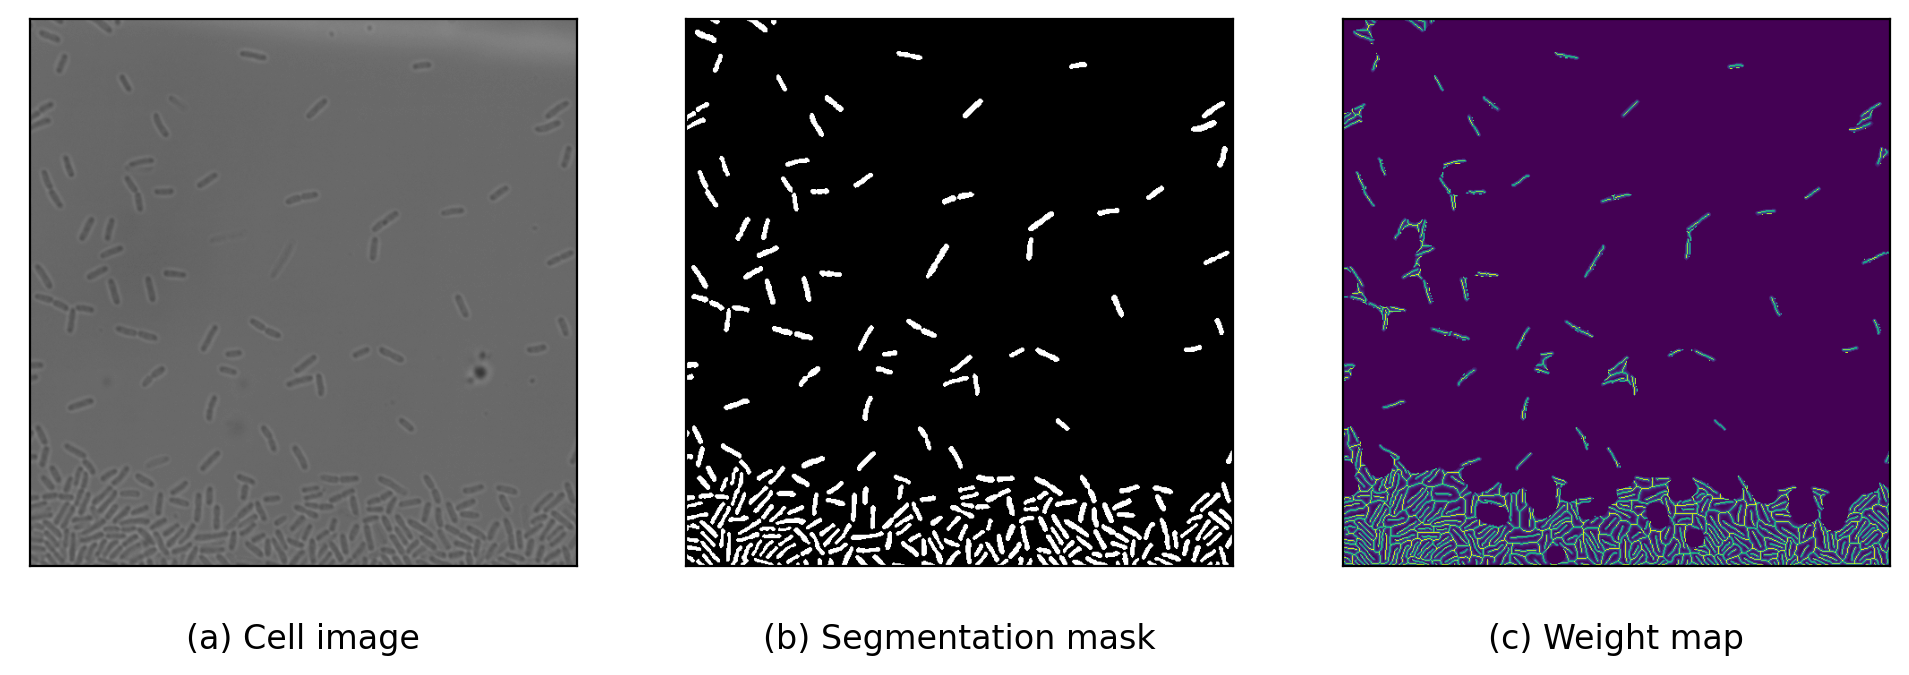

In [5]:
f, axes = plt.subplots(1, 3, figsize=(12, 4), dpi=200)
show_the_triple(image_6, mask_6, weight_map_6, axes=axes,
                axis_title_list=["(a) Cell image", "(b) Segmentation mask", "(c) Weight map"])
f.savefig(os.path.join(fig_save_path, "ch3-1_dataset_sample.jpg"), bbox_inches='tight')

Consecutive images in time order

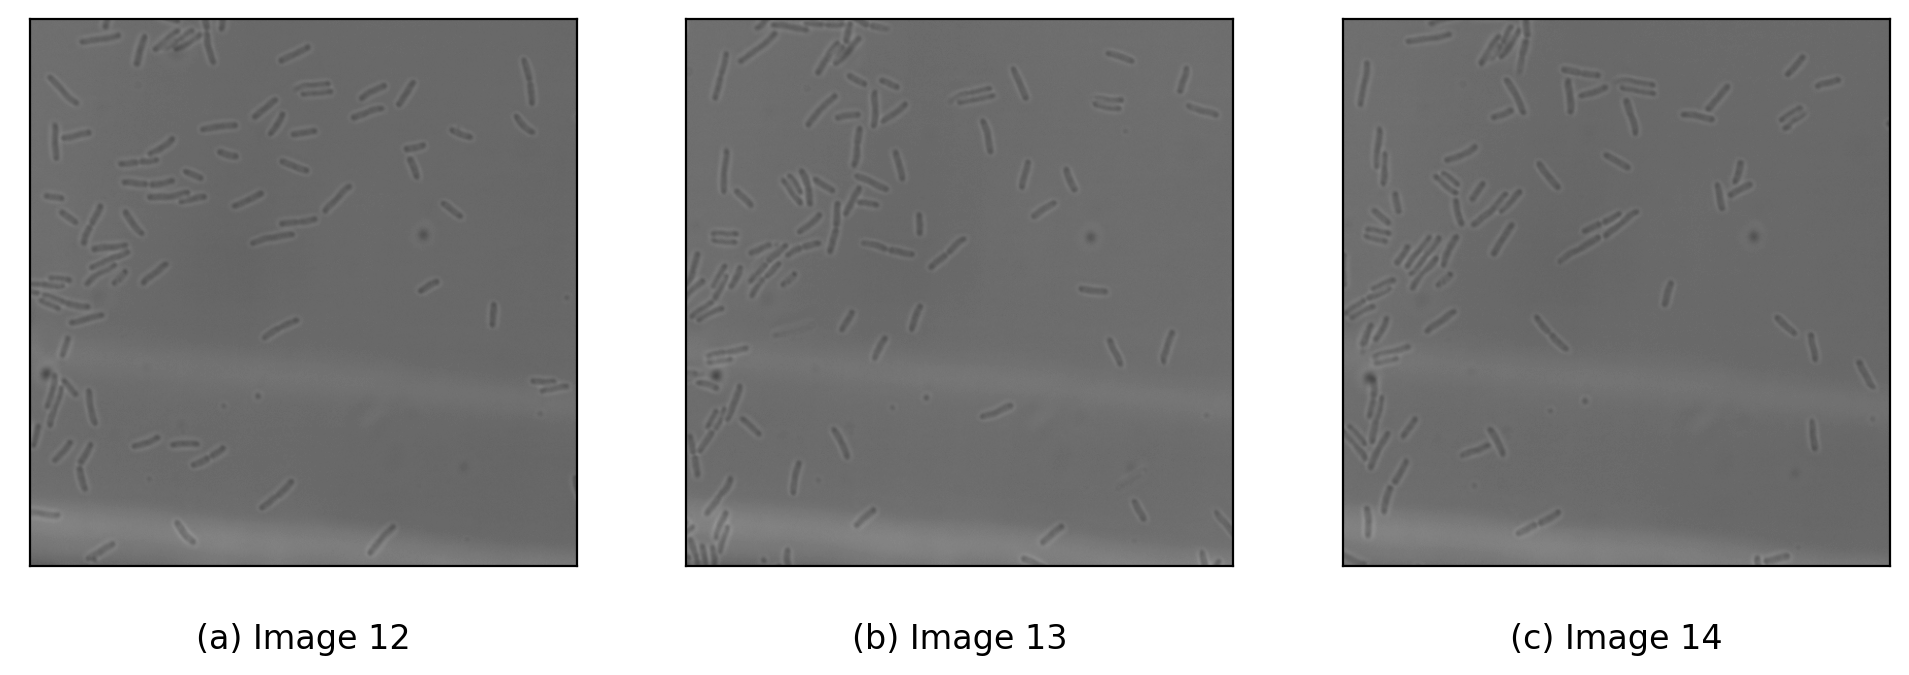

In [68]:
image_12 = cv2.imread("E:/ED_MS/Semester_3/Dataset/DIC_Set/DIC_Set1_Annotated/img_000012_1.tif", cv2.IMREAD_GRAYSCALE)
image_13 = cv2.imread("E:/ED_MS/Semester_3/Dataset/DIC_Set/DIC_Set1_Annotated/img_000013_1.tif", cv2.IMREAD_GRAYSCALE)
image_14 = cv2.imread("E:/ED_MS/Semester_3/Dataset/DIC_Set/DIC_Set1_Annotated/img_000014_1.tif", cv2.IMREAD_GRAYSCALE)

f, axes = plt.subplots(1, 3, figsize=(12, 4), dpi=200)
imshow_kwargs = {"cmap": "gray", "vmin": 0, "vmax": 255}
abc = ["a", "b", "c"]
axes[0].imshow(image_12, **imshow_kwargs)
axes[1].imshow(image_13, **imshow_kwargs)
axes[2].imshow(image_14, **imshow_kwargs)

set_axis_invisible([axes[0], axes[1], axes[2]])

axes[0].set_title("(a) Image 12", y=0, pad=-20, verticalalignment="top")
axes[1].set_title("(b) Image 13", y=0, pad=-20, verticalalignment="top")
axes[2].set_title("(c) Image 14", y=0, pad=-20, verticalalignment="top")

f.savefig(os.path.join(fig_save_path, "ch3-1_consecutive_frames_in_time.jpg"), bbox_inches='tight')

Contaminated & Unclear Images

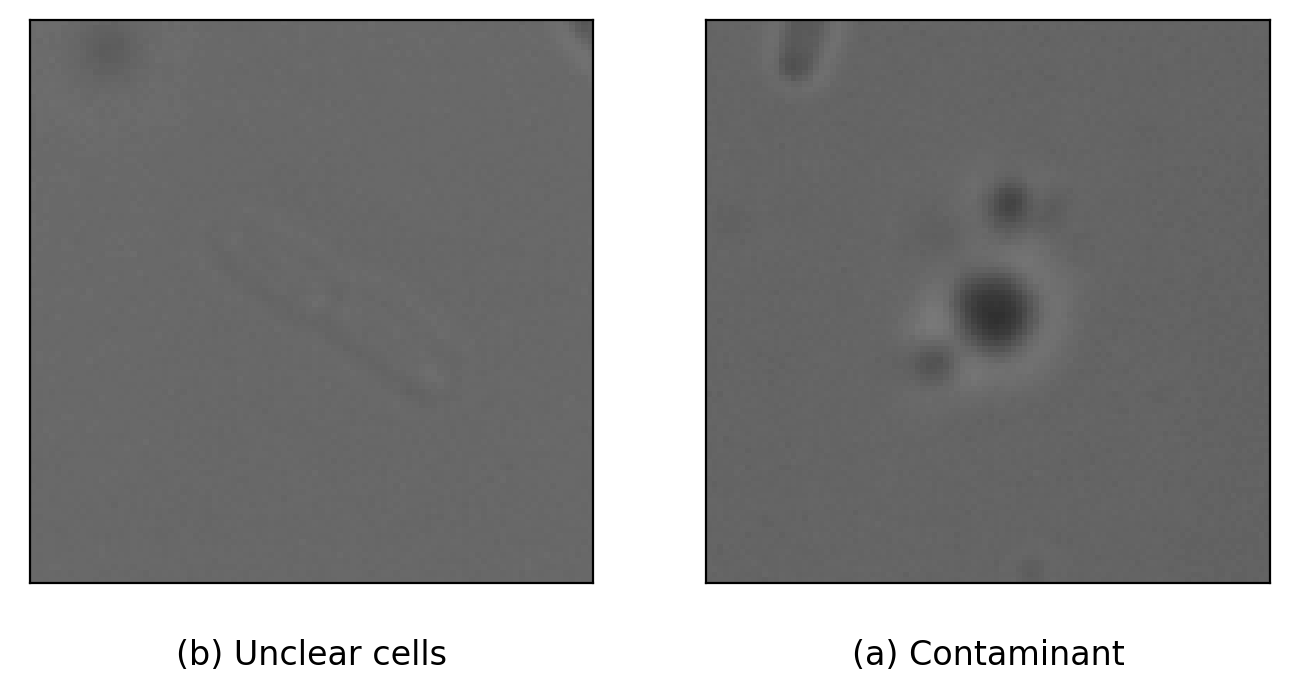

In [71]:
image_4 = cv2.imread("E:/ED_MS/Semester_3/Dataset/DIC_Set/DIC_Set1_Annotated/img_000004_1.tif",
                     cv2.IMREAD_GRAYSCALE)
image_7 = cv2.imread("E:/ED_MS/Semester_3/Dataset/DIC_Set/DIC_Set1_Annotated/img_000007_1.tif",
                     cv2.IMREAD_GRAYSCALE)

image_7_impurity = image_7[350:450, 516:616]
image_4_unclear = image_4[5:95, 195:285]
f, axes = plt.subplots(1, 2, figsize=(8, 4), dpi=200)
imshow_kwargs = {"cmap": "gray", "vmin": 0, "vmax": 255}
axes[0].imshow(image_4_unclear, **imshow_kwargs)
axes[1].imshow(image_7_impurity, **imshow_kwargs)
set_axis_invisible([axes[0], axes[1]])
axes[0].set_title("(b) Unclear cells", y=0, pad=-20, verticalalignment="top")
axes[1].set_title("(a) Contaminant", y=0, pad=-20, verticalalignment="top")

f.savefig(os.path.join(fig_save_path, "ch3-1_unclear_cell_photos.jpg"), bbox_inches='tight')

Count segments and draw contours

682 cells were found


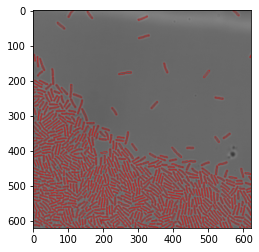

In [88]:
import cv2

image_10 = cv2.imread("E:/ED_MS/Semester_3/Dataset/DIC_Set/DIC_Set1_Annotated/img_000010_1.tif",
                      cv2.IMREAD_GRAYSCALE)
mask_10 = cv2.imread("E:/ED_MS/Semester_3/Dataset/DIC_Set/DIC_Set1_Masks/img_000010_1_mask.tif",
                     cv2.IMREAD_GRAYSCALE)
# 29 segments
contours, hierarchy = cv2.findContours(mask_10, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

print("{} cells were found".format(len(contours)))

image_10_rgb = cv2.cvtColor(image_10, cv2.COLOR_GRAY2RGB)
image_10_with_contour = cv2.drawContours(image_10_rgb, contours, -1, color=(255, 0, 0), thickness=1)
plt.imshow(image_10_with_contour)

Count cells in DIC

In [89]:
mask_list = glob.glob(os.path.join(mask_dir, "*.tif"))

total_cell_count = 0

for mask_path in tqdm(mask_list):
    mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
    contours, hierarchy = cv2.findContours(mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    total_cell_count += len(contours)

print(total_cell_count)

100%|██████████| 34/34 [00:00<00:00, 647.62it/s]

4032


 Loss Curve

In [1]:
import pandas as pd

log_df = pd.read_pickle(
    "E://ED_MS/Semester_3/Codes/MyProject/tensorboard_logs/2022-08-01_lw_unet-trained_from_scratch/log_lw_unet-trained_from_scratch.pkl")

log_df.head()

,epoch,loss,binary_IoU,binary_accuracy,val_loss,val_binary_IoU,val_binary_accuracy,lr
0,0,0.417244,0.0,0.938120,0.294721,0.0,0.941659,0.001
1,1,0.147617,0.0,0.941756,0.215664,0.0,0.941659,0.001
2,2,0.136519,0.0,0.937847,0.228029,0.0,0.941659,0.001
3,3,0.148810,0.0,0.933059,0.219078,0.0,0.941659,0.001
4,4,0.137019,0.0,0.939507,0.228233,0.0,0.941659,0.001


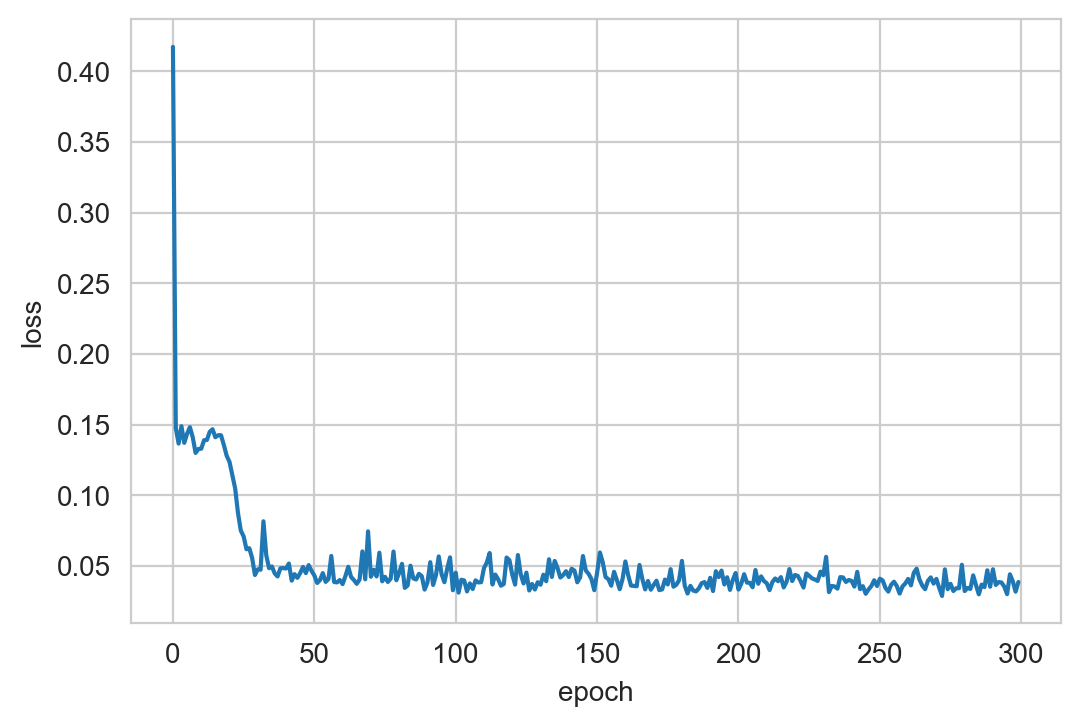

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

f, ax = plt.subplots(1, 1, dpi=200)
ax = sns.lineplot(x="epoch", y="loss", data=log_df)
# ax = sns.lineplot(x = "epoch", y="val_loss", data=log_df)
# ax.legend(["train_loss", "val_loss"])
f.savefig(os.path.join(fig_save_path, "ch3-2_loss_curve.png"))

Data Augmentation

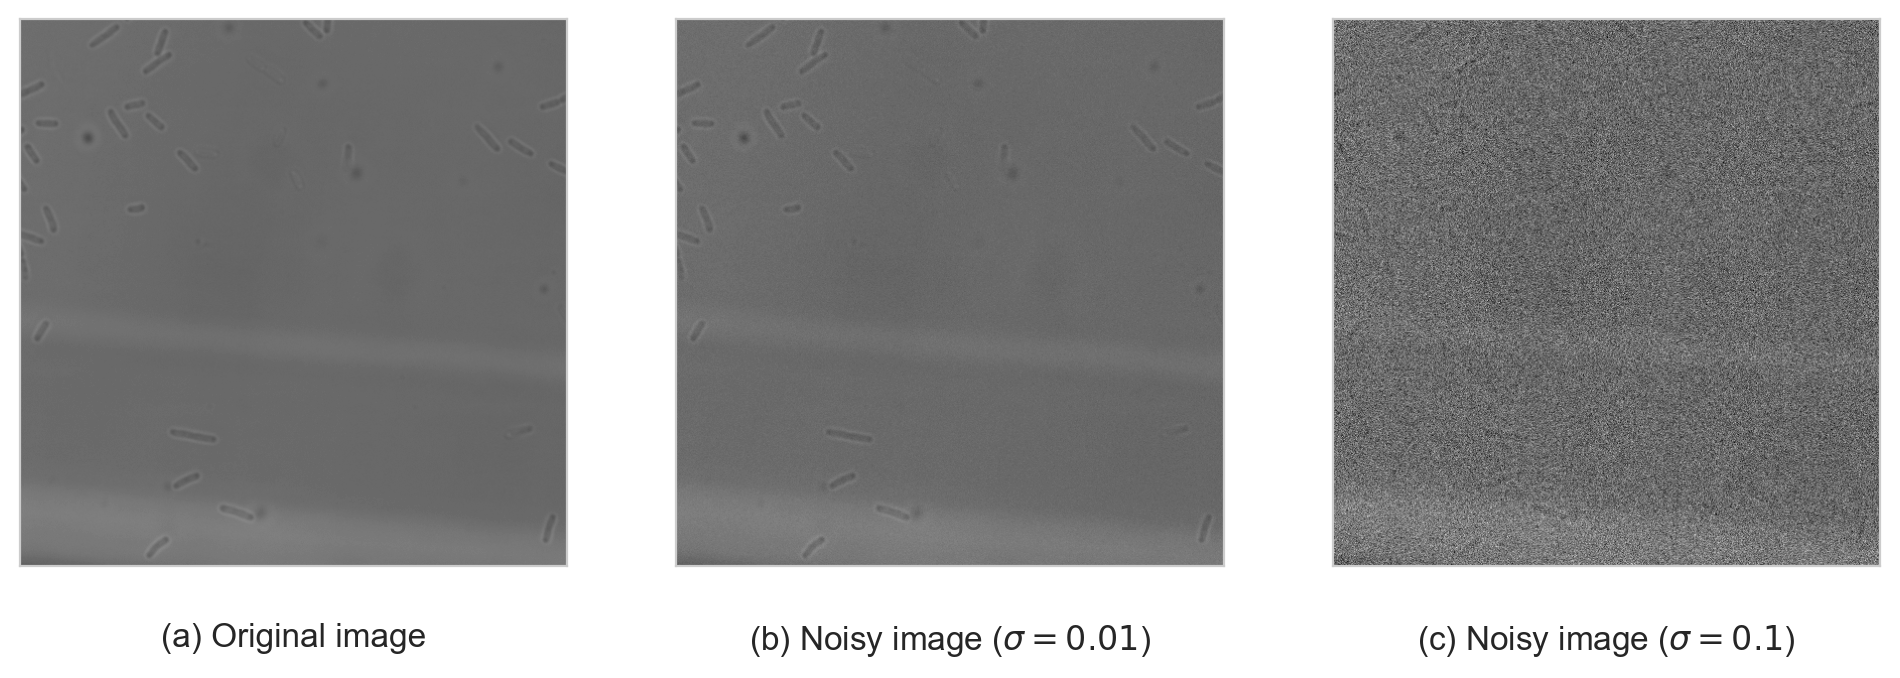

In [71]:
from data_augmentation import gaussian_noise_np

image_4 = cv2.imread("E:/ED_MS/Semester_3/Dataset/DIC_Set/DIC_Set1_Annotated/img_000004_1.tif", cv2.IMREAD_GRAYSCALE)

image_4_rescaled = image_4.astype(np.float32)/255.0

image_4_noisy_1, _, _ = gaussian_noise_np(image_4_rescaled, None, None,
                                    sigma=0.01)
image_4_noisy_2, _, _ = gaussian_noise_np(image_4_rescaled, None, None,
                                    sigma=0.1)

f, axes = plt.subplots(1, 3, figsize=(12, 4), dpi=200)
imshow_kwargs = {"cmap": "gray", "vmin": 0, "vmax": 1}

axes[0].imshow(image_4_rescaled, **imshow_kwargs)
axes[1].imshow(image_4_noisy_1, **imshow_kwargs)
axes[2].imshow(image_4_noisy_2, **imshow_kwargs)
axes[0].set_title("(a) Original image",y=0, pad=-20, verticalalignment="top")
axes[1].set_title("(b) Noisy image ($\sigma=0.01$)", y=0, pad=-20, verticalalignment="top")
axes[2].set_title("(c) Noisy image ($\sigma=0.1$)", y=0, pad=-20, verticalalignment="top")
set_axis_invisible([axes[0], axes[1], axes[2]])
f.savefig(os.path.join(fig_save_path, "ch3-2_data_augmentation_hyper-parameter.jpg"), bbox_inches='tight')

Post-processing

In [81]:
from model import get_compiled_unet

weight_path = "E:/ED_MS/Semester_3/Codes/MyProject/checkpoints/vanilla_unet-trained_from_scratch.h5"
unet = get_compiled_unet(input_size=(512, 512, 1), num_levels=5, pretrained_weights=weight_path)
image_path = "E:/ED_MS/Semester_3/Dataset/DIC_Set/DIC_Set1_Annotated/img_000011_1.tif"
mask_path = "E:/ED_MS/Semester_3/Dataset/DIC_Set/DIC_Set1_Masks/img_000011_1_mask.tif"
from data import _load_an_image_np, _resize_with_pad_or_center_crop_and_rescale

image_11 = _load_an_image_np(image_path)
mask_11 = _load_an_image_np(mask_path)
image_11, mask_11, _ = _resize_with_pad_or_center_crop_and_rescale(image_11, mask_11, None, (512,512))
import tensorflow as tf
image_11_tensor = tf.convert_to_tensor(np.expand_dims(image_11, -1))
pred_mask = unet(tf.expand_dims(image_11_tensor,0), training=False)
pred_mask = pred_mask.numpy().squeeze()

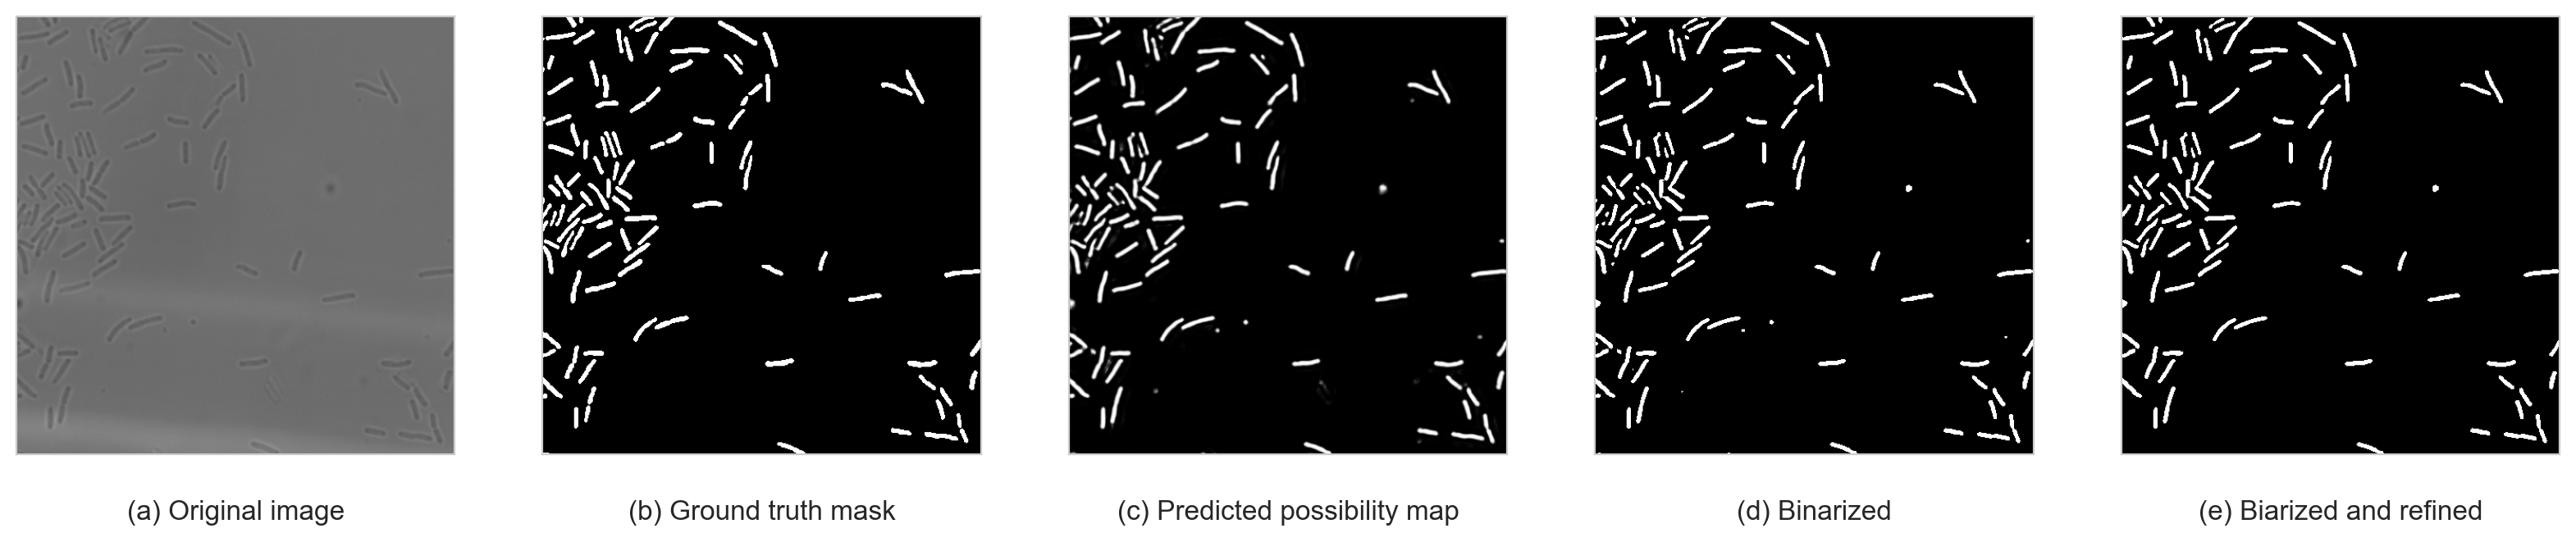

In [90]:
from data import postprocess_a_mask

binarized_pred_mask = postprocess_a_mask(pred_mask, 0.5, 0)
removed_binarized_pred_mask = postprocess_a_mask(pred_mask, 0.5, 30)

f, axes = plt.subplots(1,5,figsize=(20,4), dpi=200)
imshow_kwargs = {"cmap": "gray", "vmin": 0, "vmax": 1}
axes[0].imshow(image_11,**imshow_kwargs)
axes[1].imshow(mask_11, **imshow_kwargs)
axes[2].imshow(pred_mask, **imshow_kwargs)
axes[3].imshow(binarized_pred_mask, **imshow_kwargs)
axes[4].imshow(removed_binarized_pred_mask, **imshow_kwargs)

axes[0].set_title("(a) Original image",y=0, pad=-20, verticalalignment="top")
axes[1].set_title("(b) Ground truth mask",y=0, pad=-20, verticalalignment="top")
axes[2].set_title("(c) Predicted possibility map",y=0, pad=-20, verticalalignment="top")
axes[3].set_title("(d) Binarized",y=0, pad=-20, verticalalignment="top")
axes[4].set_title("(e) Biarized and refined",y=0, pad=-20, verticalalignment="top")

set_axis_invisible([axes[i] for i in range(5)])

f.savefig(os.path.join(fig_save_path, "ch3-2_post-processing.jpg"), bbox_inches='tight')

In [91]:
iou_metric = tf.keras.metrics.BinaryIoU()
iou_metric.update_state(y_pred=pred_mask, y_true=mask_11)
print("binary mask, IoU = {}".format(iou_metric.result()))
iou_metric.reset_state()
iou_metric.update_state(y_pred=removed_binarized_pred_mask, y_true=mask_11)
print("removed binary mask, IoU = {}".format(iou_metric.result()))

binary mask, IoU = 0.9038845300674438
removed binary mask, IoU = 0.9032986760139465
